In [1]:
import pandas as pd

In [2]:
corona = pd.read_csv('../../csv/corona.csv')
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [6]:
corona.drop(['Unnamed: 0'], axis=1, inplace = True)

In [7]:
corona.head()

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [13]:
corona.columns = ['creat_dt', 'death_cnt', 'decide_cnt','seq', 'state_dt','state_time', 'update_dt','acc_exame_cnt', 'acc_def_rate']

In [14]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   creat_dt       820 non-null    object 
 1   death_cnt      820 non-null    int64  
 2   decide_cnt     820 non-null    int64  
 3   seq            820 non-null    int64  
 4   state_dt       820 non-null    int64  
 5   state_time     820 non-null    object 
 6   update_dt      817 non-null    object 
 7   acc_exame_cnt  692 non-null    float64
 8   acc_def_rate   623 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 57.8+ KB


In [15]:
corona.isna().sum()

creat_dt           0
death_cnt          0
decide_cnt         0
seq                0
state_dt           0
state_time         0
update_dt          3
acc_exame_cnt    128
acc_def_rate     197
dtype: int64

In [20]:
corona.sort_values(['creat_dt'],inplace = True)

In [21]:
corona['death_cnt'].diff()

819     NaN
818     6.0
817     6.0
816     1.0
815     5.0
       ... 
4       9.0
3      20.0
2      21.0
1      20.0
0       6.0
Name: death_cnt, Length: 820, dtype: float64

In [23]:
corona['daily_death_cnt'] = corona['death_cnt'].diff()

In [24]:
corona.head()

,creat_dt,death_cnt,decide_cnt,seq,state_dt,state_time,update_dt,acc_exame_cnt,acc_def_rate,daily_death_cnt
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,6.0
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,6.0
816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,1.0
815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,5.0


In [25]:
corona['daily_death_cnt'].shift(1)

819     NaN
818     NaN
817     6.0
816     6.0
815     1.0
       ... 
4      17.0
3       9.0
2      20.0
1      21.0
0      20.0
Name: daily_death_cnt, Length: 820, dtype: float64

In [26]:
corona[['daily_death_cnt']].fillna(0)

,daily_death_cnt
819,0.0
818,6.0
817,6.0
816,1.0
815,5.0
...,...
4,9.0
3,20.0
2,21.0
1,20.0


In [27]:
import matplotlib.pyplot as plt

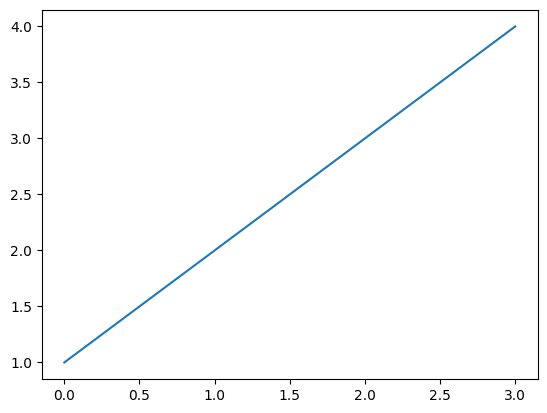

In [28]:
plt.plot([1,2,3,4])
plt.show()


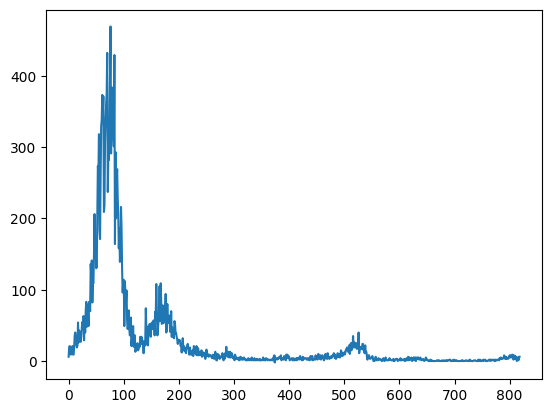

In [29]:
plt.plot(corona['daily_death_cnt'])

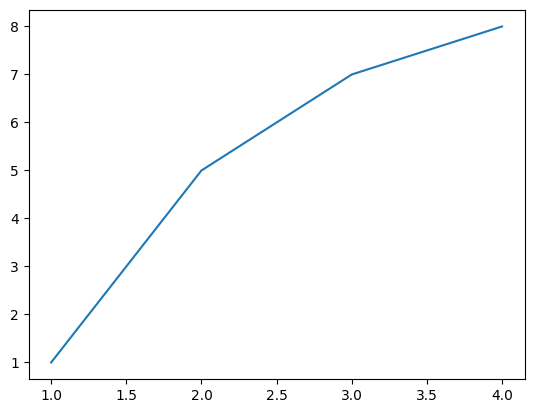

In [30]:
plt.plot([1,2,3,4],[1,5,7,8])

In [32]:
pd_list = pd.Series([5000,4000,3000], ['Americano', 'cafe_latte','long_black'])
print(pd_list)

Americano     5000
cafe_latte    4000
long_black    3000
dtype: int64


In [34]:
print('series_values =', pd_list.values)
print('series_index =', pd_list.index)

series_values = [5000 4000 3000]
series_index = Index(['Americano', 'cafe_latte', 'long_black'], dtype='object')
